In [1]:
from helpers import *
from structure import UmbrellaGrid

### **Rows** and **Columns**

In [2]:
degree = 3
rows = 2
cols = 2
file_name='BLABLA_swe'
deployment = 'min'

In [3]:
file_name = f'{degree:0>2}_{rows:0>2}_{cols:0>2}_{deployment}_{file_name}'
grid = UmbrellaGrid(degree, rows, cols)

### **Deployed** and **Undeployed**

In [4]:
deployed_cells  = grid.border()
undeployed_cells = grid.hline(1)

- grid.border()
- grid.center()
- grid.vline(line_idx)
- grid.hline(line_idx)
- grid.cross(arm_length)

---

In [5]:
active_cells    = deployed_cells + undeployed_cells
target_percents = [100]*len(deployed_cells) + [0]*len(undeployed_cells) # 0:undeployed | 100:deployed

In [6]:
grid.generate_mesh(file_name)

PLATE CHARACTERISTIQUES:
	plate thickness   : 0.027740
	plate edge length : 0.277398


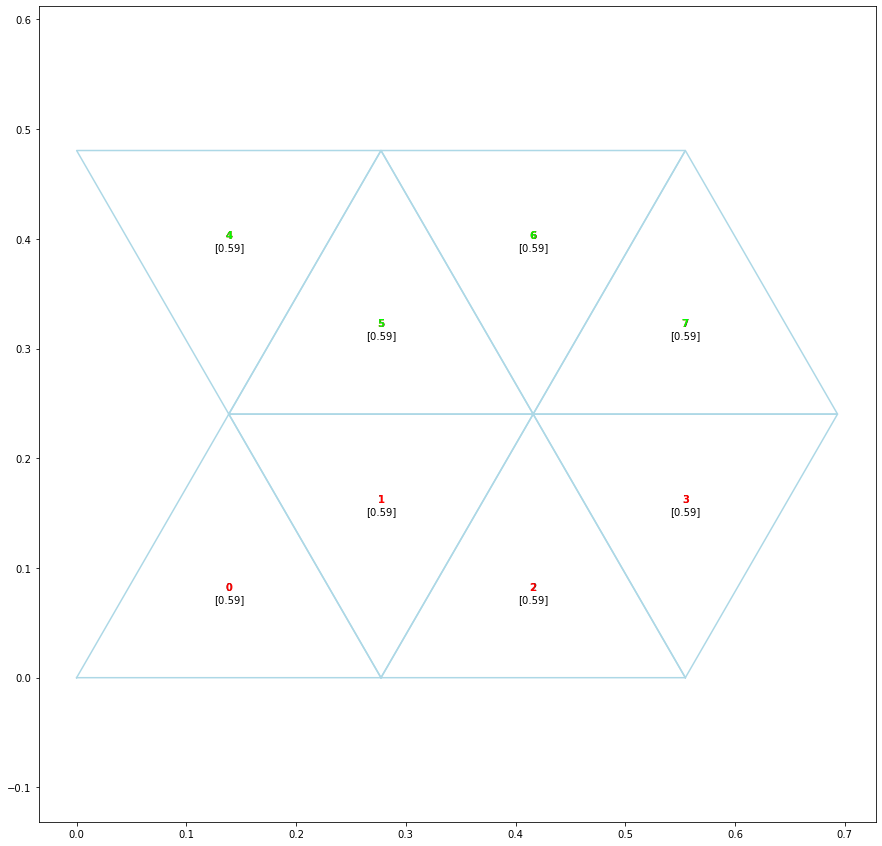

In [7]:
plot2D(grid.input_data, grid.curr_um, True, active_cells=active_cells, target_percents=target_percents)

In [8]:
view3D = plot3D(grid.curr_um, grid.input_data)
view3D.show()

Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

In [9]:
grid.deploy(active_cells, target_percents, view3D)

success: True 

energies:
   -7.997827: Full
    0.002082: Elastic
   -7.999909: Deployment
    0.000000: Repulsion
    0.000000: Attraction
    0.000000: AngleBoundPenalty



In [10]:
if grid.rows==1 or grid.cols==1:
    projection2D(grid.input_data, grid.curr_um, active_cells=active_cells, target_percents=target_percents)

In [11]:
sview_vm = plot3D_stress(grid.curr_um, 'maxBending')
sview_vm.show()

maxBending Stresses Extrem values:
    max : 1.76e+02
    min : 0.00e+00


Renderer(camera=PerspectiveCamera(aspect=1.3333333333333333, children=(PointLight(color='#999999', position=(0…

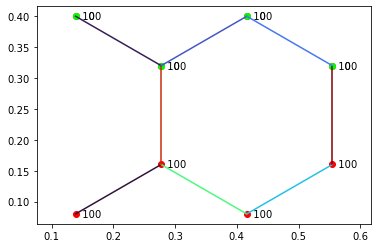

In [12]:
plot2D_stress(grid.curr_um, grid.input_data, grid.init_center_pos, active_cells, target_percents, show_percent=True)

### **Step Deployments**

In [13]:
stresses_per_steps, percents_per_steps = \
deploy_in_steps(grid.curr_um,
                grid.input_data,
                grid.init_heights,
                grid.plate_thickness,
                active_cells,
                target_percents,
                steps=10,
                stress_type='maxBending',
                verbose=True,
                dep=deployment)

step  0/10 computed.
step  1/10 computed.
step  2/10 computed.
step  3/10 computed.
step  4/10 computed.
step  5/10 computed.
step  6/10 computed.
step  7/10 computed.
step  8/10 computed.
step  9/10 computed.
step 10/10 computed.


### **Save images**

In [14]:
plot2D_steps(grid.input_data,
             active_cells,
             percents_per_steps,
             grid.init_center_pos,
             stresses_per_steps,
             stress_type='maxBending',
             dir_name=file_name,
             show_percent=False,
             show_plot=False)

### **Create GIF**

In [15]:
path_name = f'./images/{file_name}'
img_name = f'"{path_name}/'+'*{}*.jpg"'
gif_name = f'"{path_name}/'+'{}.gif"'
fps  = 5 # frames per seconds
loop = 0 # -1: no loop | 0: infinit loop | 1: loop once (see image twice) | 2: loop twice | ...
for name in ['structure_all', 'structure_perSteps', 'structure_own', 'scatter', 'sPlot']:
    img_name_i = img_name.format(name)
    gif_name_i = gif_name.format(name)
    !ffmpeg  -loglevel panic -f image2 -r $fps -loop $loop -pattern_type glob -i $img_name_i $gif_name_i